# Hypothesis mechanism checker

This notebook serves as a hypothesis checker to analyse previously generated spatio-temporal radial heatmaps in lieu of certain new ideas etc etc etc

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib

### Distribution of wild-type divisions around Scr<sup>KD</sup> apoptoses

Hypothesis #1 is that the generally diffuse low probabilities of wt division is indicative of a mechanical mechanism of competition. This means that the competition is not apparent on a single-cell level via measuring coincidences of divisions and apoptoses, rather the competition is driven by mechanical forces that operate over several cell diameters.

One way to measure this is to see if the P(div) around a Scr apop is above a background rate across different time scales.

##### Loading heatmaps 

In [55]:
canon_arrays = np.load('/home/nathan/data/results/radial_analysis_output/follow/arrays/scr_apop_wt_div_N_cell_N_event_P_event_800.800.10.npz')
control_arrays = np.load('/home/nathan/data/results/radial_analysis_output/follow/arrays/wt_control_wt_div_N_cell_N_event_P_event_800.800.10.npz')

Array key: 

    arr_0 = N_cells
    arr_1 = N_events
    arr_2 = P_events
    
Array dimensionality:

    y = temporal dimension
    x = radial dimension

In [56]:
for i in canon_arrays:
    print(i)

arr_0
arr_1
arr_2


In [57]:
canon_arrays['arr_2']

array([[0.00207791, 0.00224084, 0.00141168, 0.00132865, 0.00141313,
        0.00091527, 0.00105961, 0.00105217, 0.00113566, 0.00111346],
       [0.00197637, 0.00177525, 0.00163802, 0.0015011 , 0.00134412,
        0.0012967 , 0.00134064, 0.00128581, 0.00126718, 0.00118534],
       [0.00175041, 0.0017683 , 0.0017051 , 0.00156908, 0.00148989,
        0.00137225, 0.00140396, 0.00138051, 0.00134145, 0.00129904],
       [0.00191597, 0.00168858, 0.00178383, 0.00166355, 0.00152496,
        0.00138755, 0.00140474, 0.00143284, 0.00131253, 0.00133735],
       [0.00171874, 0.00172032, 0.001738  , 0.00161022, 0.00153505,
        0.00142475, 0.00142009, 0.00142066, 0.0013129 , 0.00129414],
       [0.00184081, 0.00184503, 0.00173159, 0.00167957, 0.00156042,
        0.00148146, 0.00145129, 0.00143947, 0.00136   , 0.00127561],
       [0.00186075, 0.00181038, 0.00169634, 0.00164578, 0.00154604,
        0.00146484, 0.00145331, 0.00143062, 0.0013681 , 0.00131944],
       [0.00185229, 0.00192518, 0.0017565

In [35]:
P_events = canon_arrays['arr_2']
P_events_c = control_arrays['arr_2']

How these plots are typically displayed

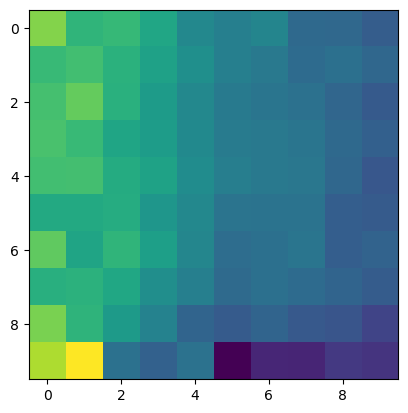

In [14]:
plt.imshow(np.flipud(P_events))
plt.show()

In [58]:
P_events[:, 1]
# this radial column is of interest

array([0.00224084, 0.00177525, 0.0017683 , 0.00168858, 0.00172032,
       0.00184503, 0.00181038, 0.00192518, 0.00184179, 0.00178073])

#### Plotting radial columns

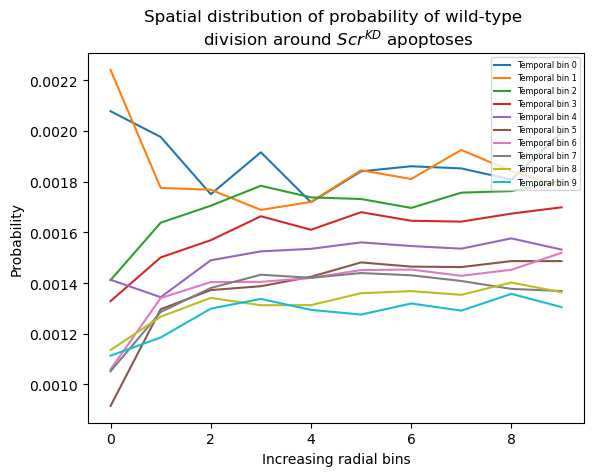

In [39]:
for n, i in enumerate(P_events.transpose()):
    plt.plot(i, label = f'Temporal bin {n}')
plt.legend(loc = 'upper right', fontsize = 'xx-small')
plt.xlabel('Increasing radial bins')
plt.ylabel('Probability')
plt.title('Spatial distribution of probability of wild-type \n division around $Scr^{KD}$ apoptoses')
plt.show()

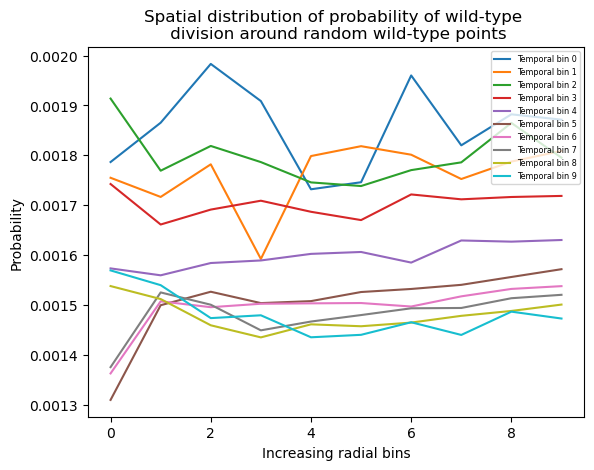

In [41]:
for n, i in enumerate(P_events_c.transpose()):
    plt.plot(i, label = f'Temporal bin {n}')
plt.legend(loc = 'upper right', fontsize = 'xx-small')
plt.xlabel('Increasing radial bins')
plt.ylabel('Probability')
plt.title('Spatial distribution of probability of wild-type \n division around random wild-type points')
plt.show()

#### Plotting temporal rows

Just to confirm

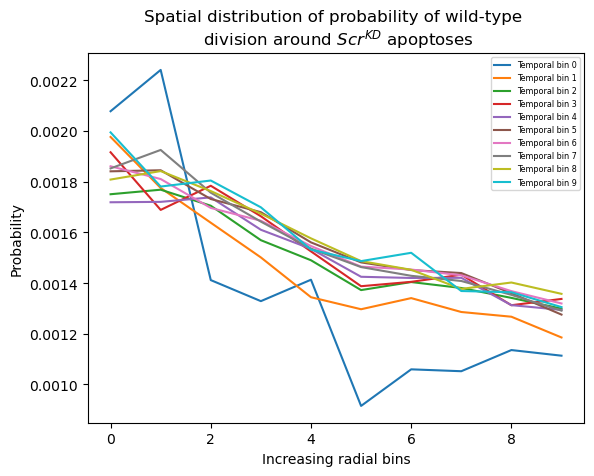

In [59]:
for n, i in enumerate(P_events):
    plt.plot(i, label = f'Temporal bin {n}')
plt.legend(loc = 'upper right', fontsize = 'xx-small')
plt.xlabel('Increasing radial bins')
plt.ylabel('Probability')
plt.title('Spatial distribution of probability of wild-type \n division around $Scr^{KD}$ apoptoses')
plt.show()

### Difference between radial columns canon and background control

In [76]:
radius = 800
num_bins = 10

In [83]:
range(len(P_events)*int(radius/num_bins))

range(0, 800)

In [85]:
np.linspace(0, radius, num_bins + 1)

array([  0.,  80., 160., 240., 320., 400., 480., 560., 640., 720., 800.])

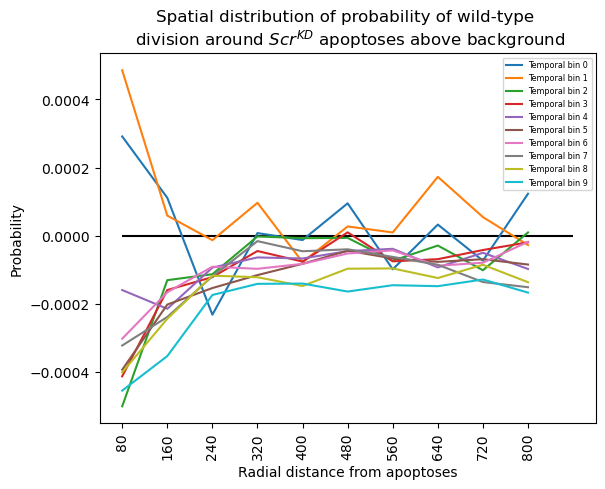

In [99]:
plt.clf()
for i in range(len(P_events)):
    plt.plot(P_events[:,i] - P_events_c[:,i], label = f'Temporal bin {i}')
plt.legend(loc = 'upper right', fontsize = 'xx-small')
plt.xticks(ticks = range(-1, num_bins), labels = np.linspace(0, radius, num_bins +1, dtype = 'uint'), rotation = 'vertical')
plt.xlabel('Radial distance from apoptoses')
plt.ylabel('Probability')
plt.hlines(y = 0, xmin = 0, xmax= 10, color = 'black')
plt.title('Spatial distribution of probability of wild-type \n division around $Scr^{KD}$ apoptoses above background')
plt.show()

# Conclusion 

This seems to suggest that the overall rate of division is generally below background levels for each timepoint before and after the apoptosis event

If it were above background levels you could posit that there is an increased chance of division across all spatial bins and that this is evidence for mechanical competition at play via division events. However this is not the case, fuelling my suspicion that division events aren't driving the competition, they are merely a side effect of the competition.

Should I change the radial analysis to measure other events beside division?

# Measuring radial distribution of cell density (N_cells/area)

In [101]:
N_cells = canon_arrays['arr_0']

In [102]:
N_cells

array([[  39944.,   63369.,   98464.,  144508.,  222201.,  407531.,
         381274.,  346902.,  308191.,  246079.],
       [ 191260.,  291227.,  431009.,  614884.,  903194., 1173751.,
        1092761.,  984594.,  855442.,  696000.],
       [ 305071.,  459764.,  683245.,  979554., 1411517., 1772267.,
        1666717., 1508136., 1312013., 1054627.],
       [ 388836.,  598136.,  886294., 1270176., 1847260., 2293253.,
        2144163., 1942998., 1690633., 1354166.],
       [ 468365.,  710913., 1062713., 1505382., 2177134., 2712057.,
        2530831., 2282736., 1982634., 1591018.],
       [ 524769.,  795109., 1174641., 1672450., 2431397., 3044286.,
        2842990., 2543298., 2211770., 1763072.],
       [ 544403.,  839603., 1244441., 1777271., 2598903., 3254283.,
        3033076., 2719802., 2348512., 1878065.],
       [ 550129.,  848752., 1275243., 1822367., 2680932., 3369656.,
        3145701., 2815028., 2420416., 1922275.],
       [ 544714.,  835057., 1264414., 1825687., 2686638., 337074

Need a 10x10 array where each row is the area of that spatial bin (first in pixels)

In [116]:
def bin_area(bin_num):
    import math
    bin_size = 80
    area = (math.pi * ((bin_num*bin_size)**2)) - (math.pi * ((bin_num-1)*bin_size)**2)
    return area

In [119]:
bin_area(3)

100530.96491487337

In [129]:
for i in range(len(area_array)):
               area_array[i,:] = bin_area(i+1)
area_array

array([[ 20106.19298297,  20106.19298297,  20106.19298297,
         20106.19298297,  20106.19298297,  20106.19298297,
         20106.19298297,  20106.19298297,  20106.19298297,
         20106.19298297],
       [ 60318.57894892,  60318.57894892,  60318.57894892,
         60318.57894892,  60318.57894892,  60318.57894892,
         60318.57894892,  60318.57894892,  60318.57894892,
         60318.57894892],
       [100530.96491487, 100530.96491487, 100530.96491487,
        100530.96491487, 100530.96491487, 100530.96491487,
        100530.96491487, 100530.96491487, 100530.96491487,
        100530.96491487],
       [140743.35088082, 140743.35088082, 140743.35088082,
        140743.35088082, 140743.35088082, 140743.35088082,
        140743.35088082, 140743.35088082, 140743.35088082,
        140743.35088082],
       [180955.73684677, 180955.73684677, 180955.73684677,
        180955.73684677, 180955.73684677, 180955.73684677,
        180955.73684677, 180955.73684677, 180955.73684677,
        180

In [130]:
dens_cells = N_cells/area_array

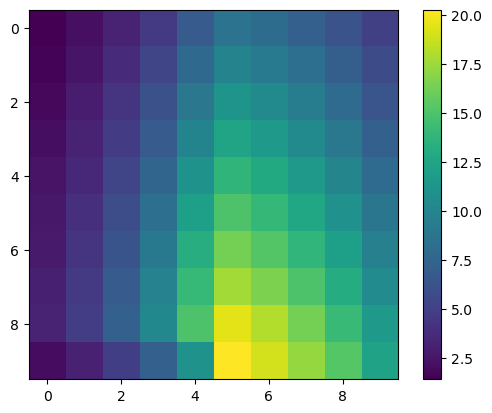

In [132]:
plt.imshow(np.flipud(dens_cells))
plt.colorbar()
plt.show()

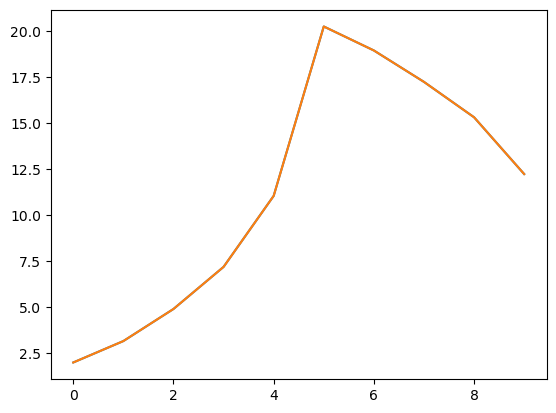

In [136]:
plt.plot(dens_cells[0,:])
plt.show()